# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=256, record_each=16, 
            homeo_method='HAP', homeo_params=dict(eta_homeo=0.05, alpha_homeo=0.02),
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.32s.


## White Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   256 (elapsed time:   0s,  0.0mn)
Iteration  26 /   256 (elapsed time:  14s,  0.0mn)
Iteration  52 /   256 (elapsed time:  27s,  0.0mn)
Iteration  78 /   256 (elapsed time:  35s,  0.0mn)
Iteration  104 /   256 (elapsed time:  48s,  0.0mn)
Iteration  130 /   256 (elapsed time:  59s,  0.0mn)
Iteration  156 /   256 (elapsed time:  67s,  1.0mn)
Iteration  182 /   256 (elapsed time:  79s,  1.0mn)
Iteration  208 /   256 (elapsed time:  88s,  1.0mn)
Iteration  234 /   256 (elapsed time:  99s,  1.0mn)
Learning code... done (total time:  108s,  1.8mn)
done in 109.01s.


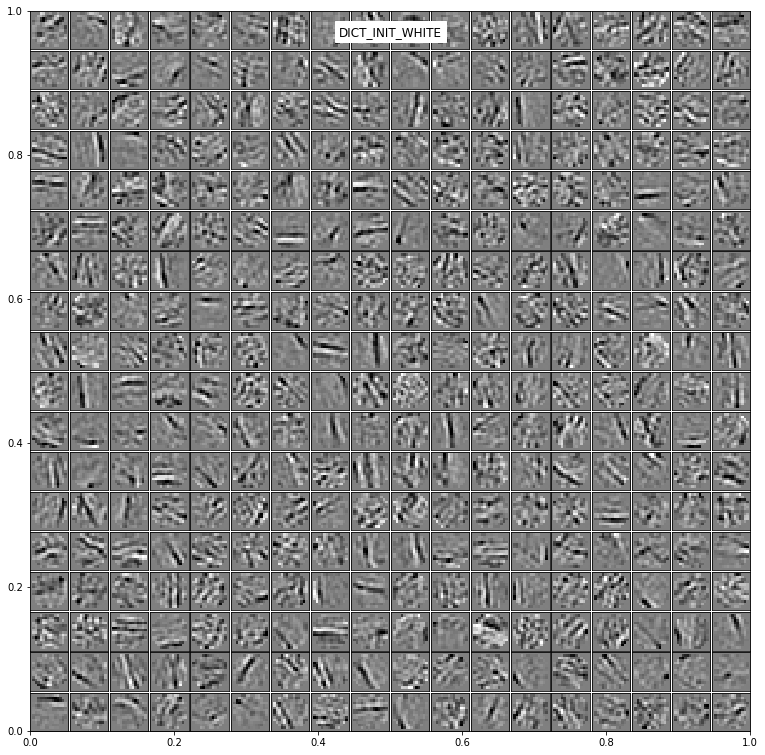

In [5]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   256 (elapsed time:   0s,  0.0mn)
Iteration  26 /   256 (elapsed time:  14s,  0.0mn)
Iteration  52 /   256 (elapsed time:  26s,  0.0mn)
Iteration  78 /   256 (elapsed time:  34s,  0.0mn)
Iteration  104 /   256 (elapsed time:  47s,  0.0mn)
Iteration  130 /   256 (elapsed time:  59s,  0.0mn)
Iteration  156 /   256 (elapsed time:  68s,  1.0mn)
Iteration  182 /   256 (elapsed time:  81s,  1.0mn)
Iteration  208 /   256 (elapsed time:  91s,  1.0mn)
Iteration  234 /   256 (elapsed time:  106s,  1.0mn)
Learning code... done (total time:  115s,  1.9mn)
done in 115.67s.


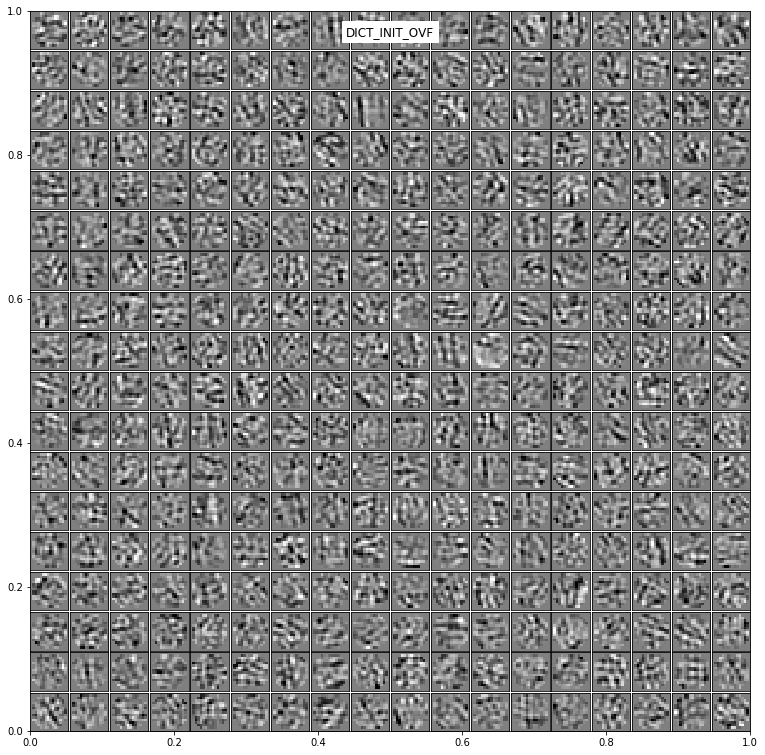

In [6]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

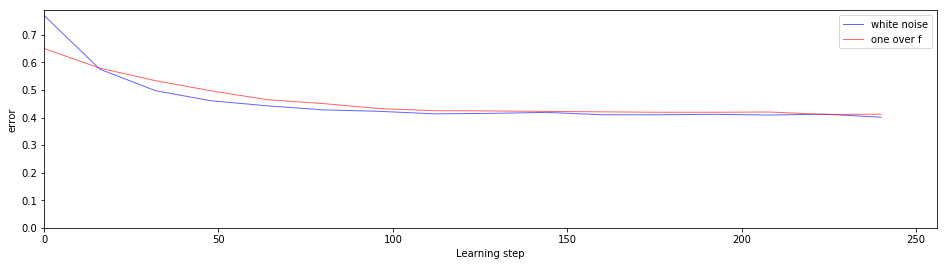

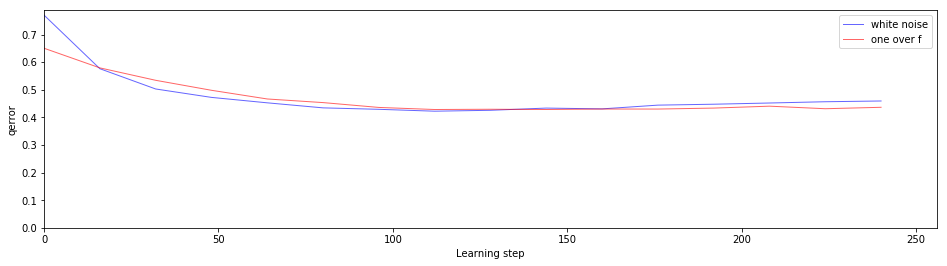

In [7]:
for variable in ['error', 'qerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_w, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='white noise')
    fig_error, ax_error = shl.time_plot(dico_1oF, variable=variable, fig=fig_error, ax=ax_error, color='red', label='one over f')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();